# Scenario C - Peak Number Variation (results evaluation)

This file is used to evaluate the inference (numerical) results.

The model used in the inference of the parameters is formulated as follows: 

\begin{equation}
\large y = f(x) = \sum\limits_{m=1}^M \big[A_m \cdot e^{-\frac{(x-\mu_m)^2}{2\cdot\sigma_m^2}}\big] + \epsilon
\end{equation}

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import seaborn as sns

#az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.8


## Import local modules

In [2]:
import sys
sys.path.append('../../modules')
import results as res

In [3]:
def heatmap(data, plist, title, color, fsize, fname="./heatmap", precision=".3f"):
    ''' plots a heatmap from numerical data provided in a NxN matrix '''
    
    sns.set(font_scale=1.3)
    
    plt.figure(figsize=fsize)
    plt.title(title)

    yticks = ["m_%dp" % val for _, val in enumerate(plist)]
    xticks = ["d_%dp" % val for _, val in enumerate(plist)]
    
    #sns.heatmap(data, annot=True, fmt=precision, linewidths=1, linecolor="#efefef", square=True,
    #                cmap=color, cbar=False, xticklabels=xticks, yticklabels=yticks)
    sns.heatmap(data, annot=True, fmt=precision, linewidths=1, square=True,
                    cmap=color, cbar=False, xticklabels=xticks, yticklabels=yticks)

    plt.yticks(rotation=0)
    plt.xticks(rotation=0)
    
    plt.savefig(fname + '.png', dpi=150)

## Load results and extract convergence information

In [4]:
# number of mrun result files
nrun = 2

if 'nrun' in locals():
    # load results into list of dataframes
    ldf = []
    for i in range(nrun):
        fname = './scenario_peaks_mruns_{0:02d}.csv'.format(i+1)
        print("reading file: {0}".format(fname))
        df = pd.read_csv(fname)
        df.index += 1
        ldf += [df]
else:
    ldf = pd.read_csv( './output_4x4/scenario_peaks.csv')
    ldf.index += 1

reading file: ./scenario_peaks_mruns_01.csv
reading file: ./scenario_peaks_mruns_02.csv


In [5]:
# extract the convergence results per model
peaklist = [2,3,4,5,6]
dres = res.get_model_summary(ldf, peaklist, mruns='yes')

processing dataframe:  1
number of runs      :  4
processing dataframe:  2
number of runs      :  4


In [6]:
# figure size and color mapping
figs=(8,8)

#coolwarm, *bone, gray, binary, BuPu, YlGn, Blues, *Greens, Purples
col = "Greens"
col_r = col + "_r"

## Heatmaps of n-peak model vs. n-peak number in dataset

### WAIC

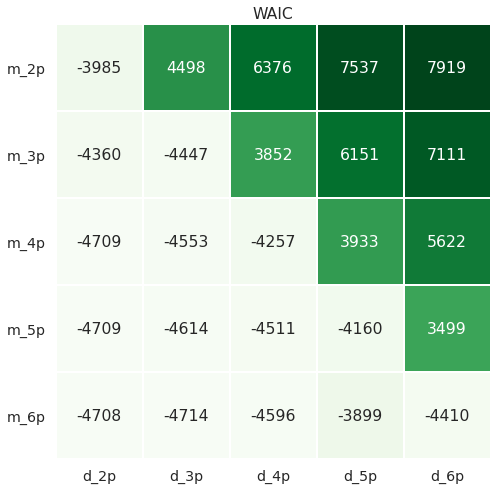

In [7]:
heatmap(dres['waic'], peaklist, "WAIC", col, figs, "hmap_waic", ".0f")

### Rhat

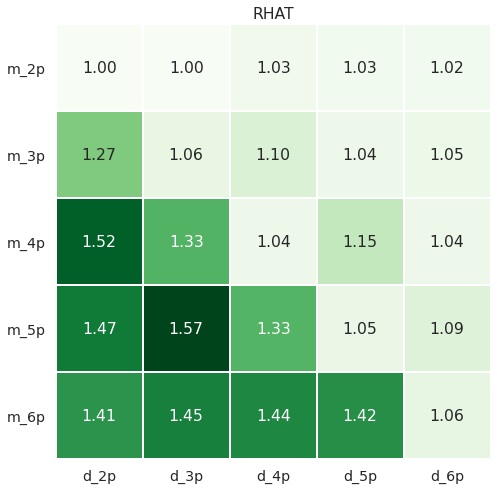

In [8]:
heatmap(dres['rhat'], peaklist, "RHAT", col, figs, "hmap_rhat", ".2f")

### R2

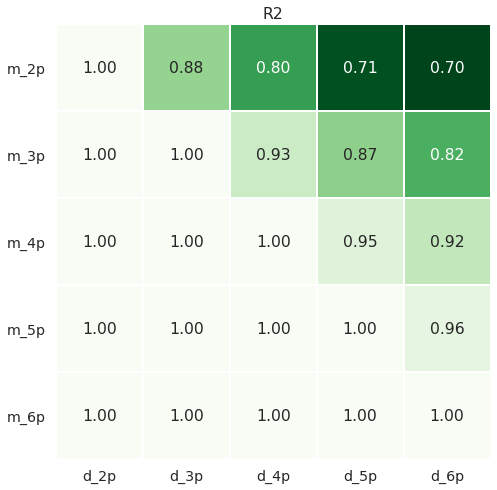

In [9]:
heatmap(dres['r2'], peaklist, "R2", col_r, figs, "hmap_r2", ".2f")

### BFMI

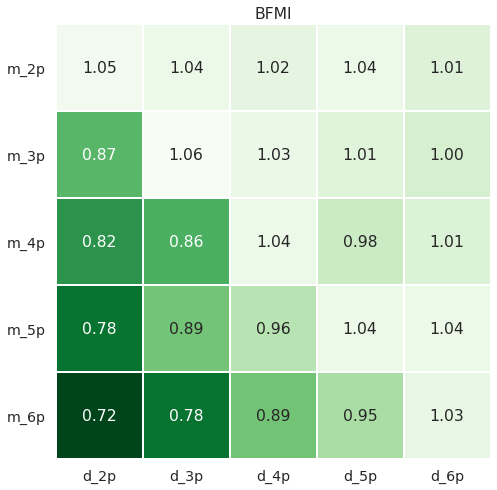

In [10]:
heatmap(dres['bfmi'], peaklist, "BFMI", col_r, figs, "hmap_bfmi", ".2f")

### MCSE

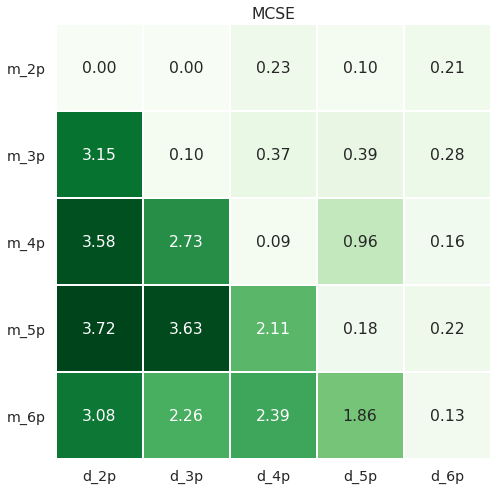

In [11]:
heatmap(dres['mcse'], peaklist, "MCSE", col, figs, "hmap_mcse", ".2f")

### Noise

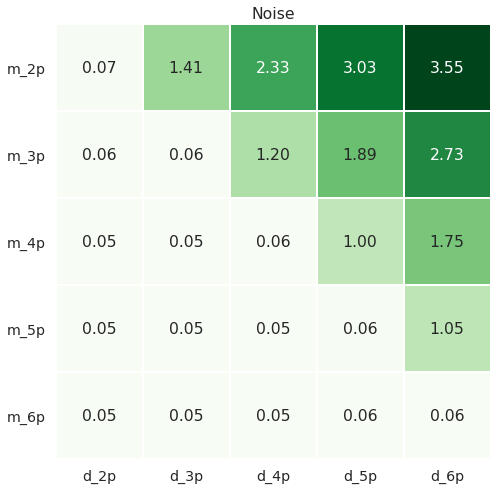

In [12]:
heatmap(dres['noise'], peaklist, "Noise", col, figs, "hmap_noise", ".2f")

### ESS

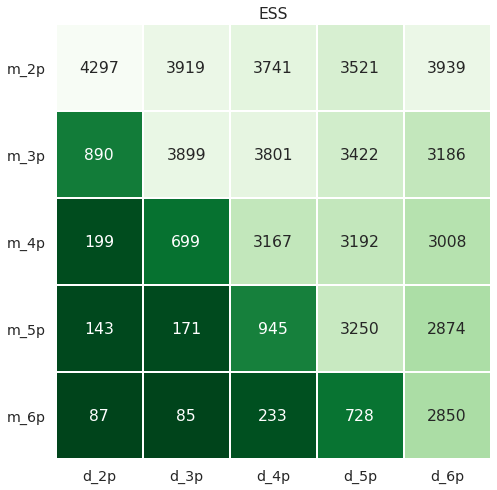

In [13]:
heatmap(dres['ess'], peaklist, "ESS", col_r, figs, "hmap_ess", ".0f")